David López Valdivia y Jimena de Prado González

# <span style='color:tan'> SEMANA 1 </span>

- Empezamos importando las librerías que vamos a usar y el dataset

In [429]:
import numpy as np, pandas as pd, seaborn as sns
import scipy
from matplotlib import pyplot as plt
pd.set_option.display_maxcolumns = 100
data = pd.read_csv('fuga_clientes_empresa_telefonica_construccion.csv')
data_explot=pd.read_csv('fuga_clientes_empresa_telefonica_explotacion.csv')

## <span style='color:darksalmon'> Paso 1: Limpieza del dataset </span>

- Vamos a empezar indicando que variables tienen valores nulos y cuáles tienen outliers para facilitar el preprocesado. 

Haremos la partición de train y test al final del preprocesado para evitar más lineas de las necesarias, ya que todas las modificaciones que aplicamos son válidas para ambos conjuntos. Una vez creemos test haremos algún cambio adicional sobre este, como borrar Churn Status.

#### <span style='color:sienna'> Valores nulos: </span>

In [430]:
data.isnull().sum()

Customer ID                                  0
network_age                                  0
Customer tenure in month                     0
Total Spend in Months 1 and 2 of 2017        0
Total SMS Spend                              0
Total Data Spend                             0
Total Data Consumption                       0
Total Unique Calls                           0
Total Onnet spend                            0
Total Offnet spend                           0
Total Call centre complaint calls            0
Network type subscription in Month 1         0
Network type subscription in Month 2        22
Most Loved Competitor network in Month 1     1
Most Loved Competitor network in Month 2     1
Churn Status                                 0
dtype: int64

#### <span style='color:sienna'> Outliers: </span>

In [431]:
#Función para detectar outliers:
def is_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR = Q3-Q1
    return (df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))
#Tomamos solo las variables numéricas
data_numericos = data.loc[:, data.dtypes != object]
is_outlier_IQR(data_numericos).sum()

network_age                                5
Customer tenure in month                   5
Total Spend in Months 1 and 2 of 2017     62
Total SMS Spend                          111
Total Data Spend                         114
Total Data Consumption                   157
Total Unique Calls                       101
Total Onnet spend                        120
Total Offnet spend                       145
Total Call centre complaint calls        124
Churn Status                               0
dtype: int64

### <span style='color:burlywood'> a) Customer ID </span>

- Esta variable representa los ID de todos los clientes, veamos sus valores únicos para comprobarlo:

In [432]:
data['Customer ID'].unique()

array(['ADF0039', 'ADF0040', 'ADF0041', ..., 'ADF1998', 'ADF1999',
       'ADF2000'], dtype=object)

- Como esta variable no es relevante podemos eliminarla

In [433]:
data= data.drop('Customer ID', axis = 1)
data_explot = data_explot.drop('Customer ID', axis= 1) #También lo quitamos del conjunto de entrenamiento

### <span style='color:burlywood'> b) network_age </span>

- Esta variable numérica informa sobre el tiempo que llevan usando esa red.Nos encontramos 5 outliers

In [434]:
print('Número de outliers:',is_outlier_IQR(data['network_age']).sum())
print('Numero de valores nulos:',data['network_age'].isnull().sum())

Número de outliers: 5
Numero de valores nulos: 0


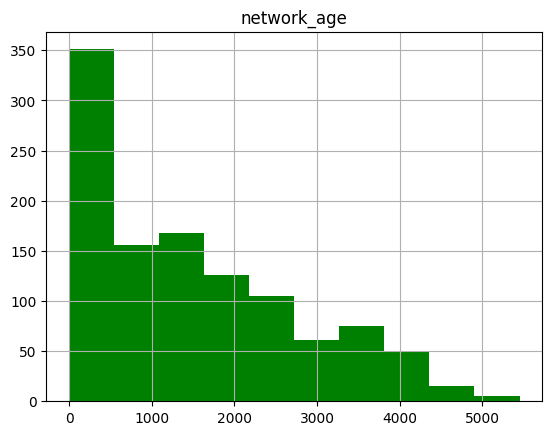

In [435]:
fig, ax = plt.subplots(1, 1) 
ax.hist(data['network_age'],color = "green") 
  
ax.set_title("network_age")
plt.grid()
plt.show()

- Se ve que tiene distribución de cola pesada. No creemos que sea necesario hacer un ajuste logarítmico en ninguna de las siguientes variables con outliers ya que este puede aumentar la sensibilidad a outliers (hemos comprobado que magnifica los efectos de los outliers) y da problemas con los valores negativos que hay en el dataset

### <span style='color:burlywood'> c) Customer tenure in month </span>

In [436]:
data['Customer tenure in month'].value_counts()

Customer tenure in month
3.90      7
3.67      6
4.17      5
4.00      4
3.57      4
         ..
20.87     1
107.10    1
23.97     1
73.83     1
31.23     1
Name: count, Length: 883, dtype: int64

- Por sus valores se puede deducir que se trata de una variable numérica representa los meses que lleva un cliente en la compañía

### <span style='color:burlywood'> d) Total Spend in Months 1 and 2 of 2017 </span>

In [437]:
data['Total Spend in Months 1 and 2 of 2017'].value_counts()

Total Spend in Months 1 and 2 of 2017
875.4000     4
437.7000     2
1841.6900    2
125.1500     2
1248.5104    2
            ..
767.6400     1
905.4300     1
85.4300      1
48.3496      1
172.1000     1
Name: count, Length: 1103, dtype: int64

- Esta variable numérica nos habla de lo que se ha gastado cada cliente en los dos meses

### <span style='color:burlywood'> e) Total SMS Spend </span>

In [438]:
data['Total SMS Spend'].value_counts()

Total SMS Spend
0.00     163
1.75      42
3.50      20
0.01      19
5.25      18
        ... 
56.72      1
35.32      1
26.18      1
9.49       1
32.40      1
Name: count, Length: 601, dtype: int64

- Por estos valores podemos deducir que se trata del gasto en mensajes SMS de cada cliente 

### <span style='color:burlywood'> f) Total Data Spend </span>

In [439]:
data['Total Data Spend'].value_counts()

Total Data Spend
0.00       223
1.25        96
2.50        45
3.75        42
5.00        34
          ... 
24.80        1
505.00       1
353.75       1
23.50        1
8295.00      1
Name: count, Length: 229, dtype: int64

- Variable numérica que nos indica el total de datos gastados

### <span style='color:burlywood'> g) Total Data Consumption </span>

In [440]:
data['Total Data Consumption'].unique()

array([1.47383000e+01, 8.34497342e+07, 7.11599229e+04, ...,
       1.31274587e+05, 2.16600627e+06, 1.82811500e+02])

- Variable numérica que nos dice el consumo total de datos

### <span style='color:burlywood'> h) Total Unique Calls </span>

In [441]:
data['Total Unique Calls'].unique()

array([ 788, 1127,   15,   70,   98,   72,   92,   49, 1460,  757,   52,
          5,  687,  195,   13,   77,  119,   44,   87,   39,  570,   19,
         11,    9,   35,   12,   33,  571,  587,  241,  104,  223, 1605,
          4,   20,   28,    8,  153,  657,   14,   82,  660,  408,  444,
        141,   16,  198,  332,   99,  207,   91,   21,    3,  460, 1238,
         29,  463,    7,  340,  209,   23,  528,   22,  954,  575,    1,
         45,  182,   34,  172,   41,  300,  163,  120,   18,  218,  116,
         27,  178,    2,  647,   24,  269,  146,  130,  225,  315,  397,
       1090,   50,   32,   53,  671,  122,  527,   65,  395,  186,  136,
        293,  200,  125,  278,  415,   76,   89,  420,  267,  224,  170,
        763,   75,  114,   42,   54, 1253,  138,  151,   73,  247,  113,
        436,  111,  166,   79,  191,   96,  147,   94,  231, 1470,   10,
        927,  112,  117,  500,  659,  324,  296,  813,    6,  339,  263,
        155, 1038,  279,   40, 1864,  105,  641,   

- Variable numérioca que nos muestra el número total de llamadas únicas

### <span style='color:burlywood'> i) Total Onnet spend </span>

In [442]:
data['Total Onnet spend'].unique()

array([  2940,      0,    131,    696,  18635,   5532,    600,   2892,
        15225,   1428,   2155,    120,  10578,  17184,  10305,   1470,
        13980,    885,   7260,   2832,     60,    480,   1024,    906,
          228,     24,    168,    888,  38778,  10255,    486,  24828,
         1254,  31601,   2710,    502,  11478,   1908,     12,  75699,
          564,   3024,  10516,   5080,    275,  24450,   5271,  11378,
          813,  18100,   4744,    992,   1092,   5713,    804,   4338,
          558,   1304,  49351,   5568,  10008,    324,  55390,   5287,
         1506,   2799,   9395,   1829,   5472,  71208,   3387,  12324,
          287,    216,  48720,   2850,    970,  16087,    753,  64872,
         4131,    526,   4584,   4853,   8928,   2421,    738,   1243,
         4569,   5634,    570,    132,   7608,  18603,   9666,   2700,
         2268,   3452,   4434,   8856,  17408,   2634,  10137,   1248,
        18157,    610,  15228,   7852,  37401,   4260,   8608,    240,
      

- Variable numérica que nos dice el tiempo que se han pasado conectados 

### <span style='color:burlywood'> j) Total Offnet spend </span>

In [443]:
data['Total Offnet spend'].value_counts()

Total Offnet spend
179      45
0        33
358      33
537      22
716      11
         ..
13308     1
3604      1
17895     1
1424      1
4794      1
Name: count, Length: 899, dtype: int64

- Igual que la anterior pero esta nos indica el tiempo que han pasado desconectados

###  <span style='color:burlywood'> k) Total Call centre complaint calls </span>

In [444]:
data['Total Call centre complaint calls'].unique()

array([ 4,  2,  1,  3,  5, 13, 12,  6, 14,  8, 16,  7, 11, 21, 10,  9, 18,
       15, 49], dtype=int64)

- Variable numérica que nos indica el número de llamdas que se han hecho para poner una queja

### <span style='color:burlywood'>l) Network type subscription in Month 1</span>

In [445]:
data['Network type subscription in Month 1'].unique()

array(['2G', '3G', 'Other'], dtype=object)

- Variable categórica que nos indica el tipo de red a la que se suscribió el cliente  en el primer mes. Creemos que se trata de una variable categórica no ordenada ya que el valor 'Other' puede ser 5G ó E, por tanto como no sabemos si 'Other' es mejor o peor no podemos codificarla como una ordenada.

In [446]:
data = pd.get_dummies(data, columns=['Network type subscription in Month 1'], dtype= int)
data_explot = pd.get_dummies(data_explot, columns=['Network type subscription in Month 1'], dtype= int, drop_first= True) #Hacemos lo mismo para el conjunto de explotación
data = data.drop('Network type subscription in Month 1_Other', axis=1)
data_explot = data_explot.drop('Network type subscription in Month 1_Other', axis=1)

### <span style='color:burlywood'> m) Network type subscription in Month 2</span>

- Igual que la anterior, pero en el segundo mes

In [447]:
data['Network type subscription in Month 2'].unique()

array(['2G', '3G', 'Other', nan], dtype=object)

- Hacemos la codificación 'one-hot' como antes

In [448]:
data = pd.get_dummies(data, columns=['Network type subscription in Month 2'], dtype= int)
data_explot= pd.get_dummies(data_explot, columns=['Network type subscription in Month 2'], dtype= int, drop_first= True)

- Drop_first pero para el valor 'other'

In [449]:
data = data.drop('Network type subscription in Month 2_Other', axis=1)
data_explot = data_explot.drop('Network type subscription in Month 2_Other', axis=1)

### <span style='color:burlywood'> n) Most Loved Competitor network in in Month 1 </span>

In [450]:
data['Most Loved Competitor network in Month 1'].unique()

array(['Weematel', 'Uxaa', 'PQza', 'ToCall', '0', 'Mango', 'Zintel', nan],
      dtype=object)

- Variable categórica ordenada que nos informa de la empresa rival favorita en el mes 1

In [451]:
data= pd.get_dummies(data, columns=['Most Loved Competitor network in Month 1'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Most Loved Competitor network in Month 1'], dtype= int, drop_first= True)

### <span style='color:burlywood'> ñ) Most Loved Competitor network in Month 2 </span>

- Igual que la anterior pero para el mes 2

In [452]:
data['Most Loved Competitor network in Month 2'].unique()

array(['Uxaa', 'PQza', 'Mango', 'Weematel', 'ToCall', 'Zintel', nan],
      dtype=object)

- Son categóricas, codificamos

In [453]:
data = pd.get_dummies(data, columns=['Most Loved Competitor network in Month 2'], dtype= int, drop_first= True)
data_explot = pd.get_dummies(data_explot, columns=['Most Loved Competitor network in Month 2'], dtype= int, drop_first= True)

### <span style='color:burlywood'> o) Churn Status </span>

- Variable categórica dicotómica, es 0 si el cliente no abandona la compañía y 1 si lo hace.
Es nuestra variable a predecir, por tanto, eliminamos la columna de nuestro conjunto test que introducimos en el modelo (x_test).
En cuanto hagamos la partición de train y test, haremos esta separación entre x_test e y_test (esta última es la columna Churn)

### <span style='color:burlywood'> Eliminación de variables dependientes </span>

- Implementamos el algoritmo de la práctica anterior

In [454]:
matriz_corr=data.corr()

data2=data.copy()
rank1=np.linalg.matrix_rank(matriz_corr) #hay una columna a eliminar
cols=data.columns
for col in cols:
    cols2 = cols.drop(col) #Eliminamos una columna para ver si cambia el rango
    data2 = data2[cols2] #Cogemos el dataset sin esa columna
    rank2 = np.linalg.matrix_rank(data2.corr()) #Hallamos el rango de ese datset
    if rank1 == rank2: #Si los rangos siguen igual, se elimina esa columna porque es linealmente dependiente
        cols = cols2
        print(f'columna que hemos eliminado: {col}')
    else:
        data2 = data #si son distintos, esa columna es linealmente independiente y no se quita

#Nos quedamos con las columnas linealmente independientes
data= data[cols] 
#nos quitamos la columna Network type subscription in Month 1, que tb quitamos del conjunto de explotacion
data_explot=data[cols]

print(len(data.columns)) #trabajaremos con 26 variables, han aumentado tras la codificación de dummies

26


- Columnas resultantes:

In [455]:
data.columns

Index(['network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Network type subscription in Month 1_2G',
       'Network type subscription in Month 1_3G',
       'Network type subscription in Month 2_2G',
       'Network type subscription in Month 2_3G',
       'Most Loved Competitor network in Month 1_Mango',
       'Most Loved Competitor network in Month 1_PQza',
       'Most Loved Competitor network in Month 1_ToCall',
       'Most Loved Competitor network in Month 1_Uxaa',
       'Most Loved Competitor network in Month 1_Weematel',
       'Most Loved Competitor network in Month 1_Zintel',
       'Most Loved Competitor network in Month 2_PQza',
       'Most Loved Competitor network in Month 2_ToCall',
       'Most Loved Competitor network i

## <span style='color:darksalmon'> Paso 2: Construcción y análisis de un modelo dummy usando la librería scikitklearn (sklearn) </span>

### <span style='color:burlywood'> 1.2.1 Construye con el modelo DummyClassifier (sklearn.dummy.DummyClassifier) un modelo que predice siempre la clase más frecuente </span>

- Importamos lo necesario y hace la partición de los datos antes de crear el modelo

In [456]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

x = data.drop('Churn Status', axis=1)
y = data['Churn Status']

#la vairable y contienen la columna churn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) #partición train y test
#Llamamos al modelo DummyClassifier
dummyclassifier = DummyClassifier(strategy='most_frequent')
#Entrenamos al modelo con los datos de entrenamiento
dummyclassifier.fit(x_train,y_train)

DummyClassifier(strategy='most_frequent')

### <span style='color:burlywood'> 1.2.2 Calcula sus scores de clasificación en el dataset de entrenamiento y de test.¿Hay sobreajuste? </span>

In [457]:
#Calculamos la precision del modelo
train_score = dummyclassifier.score(x_train,y_train)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

In [458]:
print('Score en train:',train_score )

Score en train: 0.5186615186615187


In [459]:
#Lo mismo para test
test_score = dummyclassifier.score(x_test,y_test)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

In [460]:

print('Score en test:',test_score )

Score en test: 0.5059880239520959


- No hay sobreajuste ya que el score es bastante parecido en ambos. El sobreajuste se produciría si el score con el dataset de entrenamiento fuese demasiado alto y con el de test muy bajo, ya que entonces el modelo se estaría ajustando demasiado bien a los datos de entrenamiento y captura patrones específicos de ese conjunto de datos que no son representativos de la población general

### <span style='color:burlywood'> 1.2.3 Analiza las predicciones de clase que da en el conjunto de test (model.predict) y las estimaciones de las probabilidades de las clases (model.predict_proba). Encuentra qué relación hay entre esas salidas y las estadísticas de entrenamiento.</span>

In [461]:
#Predicciones en test
y_pred_test = dummyclassifier.predict(x_test)

In [462]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [463]:
#Estimaciones de las probabilidades de las clases
probabilidades = dummyclassifier.predict_proba(x_test)

In [464]:
probabilidades

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

- Lo que nos model.predict_proba son las probabilidades estimadas para cada clase en lugar de las predicciones de clase directas (como hace model.predict, que predice la clase más frecuente). Esto significa que en lugar de obtener una clase específica para cada instancia en x_test, obtendrás un conjunto de probabilidades asociadas a cada clase. En este caso, model.predict_proba nos indica que la probabilidad de pertenecer a la clase 0 es 1 (probabilidad máxima), mientras que la probabilidad de pertenecer a la clase 1 es 0 (probabilidad mínima). Por eso model.predict nos devuelve todo 0 

## <span style='color:darksalmon'> Paso 3: Construcción y análisis de un modelo de regresión logística usando la librería scikit-klearn (sklearn) </span>

### <span style='color:burlywood'> 1.3.1 Construye con sklearn un modelo de regresión logística (clase sklearn.lineal_model.LogisticRegression). No te olvides de estandarizar las variables de entrada. ¿Cuáles son los scores obtenidos en entrenamiento y en test? ¿Hay sobreajuste? ¿Cómo se comparan con los obtenidos con el DummyClassifier?</span>

- Importamos las librerías necesarias

In [465]:
import sklearn ; from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

- Estandarizamos las variables de entrada

In [466]:
xscaler = StandardScaler() ; 
modelo= sklearn.linear_model.LogisticRegression()

xscaler.fit(x_train)
x_train_scaled = xscaler.transform(x_train) ; x_test_scaled = xscaler.transform(x_test)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

- El método transform realiza la estandarización de las características basándose en las estadísticas aprendidas durante la fase de ajuste de fit().

- Construimos el modelo

In [467]:
modelo.fit(x_train_scaled,y_train)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


LogisticRegression()

- Obtenemos las predicciones y los scores

In [468]:
#Predicciones
predicciones_01=modelo.predict(x_test_scaled) # Estimación clases, y_pred
print(predicciones_01)
#Scores
print('Tasa de acierto en train:',modelo.score(x_train_scaled,y_train) )
print('Tasa de acierto en test:',modelo.score(x_test_scaled,y_test))

[0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1
 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1
 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1
 1 1 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1
 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1
 0]
Tasa de acierto en train: 0.7232947232947233
Tasa de acierto en test: 0.6826347305389222


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

-  Nos encontramos sobreajuste cuando a la hora de hacer la tasa de acierto sobre el conjunto de test encontramos un valor más pequeño que el score del entrenamiento, lo que quiere decir que el modelo se ajusta demasaido a los datos de entrenamiento y por tanto no generaliza bien. Como es un poco más alto el score de test, podemos decir que no hay sobreajuste.

- Si comparamos los scores con los de el DummyClasifier, es evidente que este modelo es mucho más preciso que un modelo basado en predecir siempre la clase que más se repite en los datos, ya que DummyClassifier tiene scores mucho más bajos que este modelo

### <span style='color:burlywood'> 1.3.2 Si no se especifica en LogisticRegression el parámetro C, este es 1, indicando un grado medio de regularización. Al igual que con la regresión lineal, podemos hacer que sklearn ajuste automáticamente ese parámetro de regularización usando LogisticRegressionCV. ¿Qué obtienes ahora? ¿es mejor que el anterior modelo??</span>

- Aplicamos LogisticRegressionCV

In [469]:
xscaler = StandardScaler() ; 
modelo= sklearn.linear_model.LogisticRegressionCV()

xscaler.fit(x_train)
x_train_scaled = xscaler.transform(x_train) 
xscaler = StandardScaler() 
xscaler.fit(x_test)
x_test_scaled = xscaler.transform(x_test)

modelo.fit(x_train_scaled,y_train)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

LogisticRegressionCV()

- Coeficientes

In [470]:
print('Coeficientes con sklearn',modelo.coef_)

Coeficientes con sklearn [[-0.12242687 -0.12174568 -0.80377483  0.28572892  1.04778753 -0.81410911
  -0.14172972 -0.04079986  0.88991957 -0.06612198  0.17305035  0.36540457
   0.16085872  0.00767519  0.45249904  0.3248517   0.18573357  0.33715672
   0.12281394  0.12878352  0.31945302  0.16557181 -0.44829595  0.03117301
   0.13318622]]


- Predicciones y scores

In [471]:
y_pred=modelo.predict(x_test_scaled) # Estimación clases
y_pred

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,

In [472]:
print('Tasa de acierto en train:',modelo.score(x_train_scaled,y_train) )
print('Tasa de acierto en test:',modelo.score(x_test_scaled,y_test) )

Tasa de acierto en train: 0.7258687258687259
Tasa de acierto en test: 0.6676646706586826


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

- Al usar LogisticRegressionCV() permitimos una selección automática el parametro C. Si eligiésemos LogisticRegression() con el parámetro C por defecto, corremos el riesgo 
de obtener un modelo menos robusto y generalizable, es decir, hay más probabilidades de que haya sobreajuste. Sin embargo, LogisticRegressionCV() ayuda a mitigar este riesgo al seleccionar automáticamente el mejor valor de C basándose en validación cruzada.
- Podemos observar que los coeficientes son muy similares y los scores son iguales, pero en caso de que al usar LogisticRegresion() con C=1 tuviésemos sobreajuste, ajustar la regularización podría ayudarnos a conseguir un mejor modelo, pero en esto, no podemos decir que sea un mejor modelo ya que ambos tienen la misma precisión.

# <span style='color:tan'> SEMANA 2 </span>

## <span style='color:darksalmon'> Paso 1: Construcción y análisis de un modelo de regresión logística usando la librería statsmodels </span>

### <span style='color:burlywood'> 2.1.1 Construye un modelo de regresión logística usando la librería statsmodels (clase Logit de statsmodels.api). ¿Obtiene los mismos coeficientes que sklearn? ¿Los scores son los mismos? </span>

- Como esta librería no tiene una función que devuelva la precisión en el contexto de la clasificación como lo hace scikit-learn, hemos creado el modelo con statsmodels y para  medir el score hemos usado la función accuracy_score de sklearn.metrics.

- Imports

In [473]:
import statsmodels.api as sm ; from sklearn.metrics import accuracy_score

- Definimos el modelo 

In [474]:
model = sm.Logit(y_train, sm.add_constant(x_train)).fit()

Optimization terminated successfully.
         Current function value: 0.541777
         Iterations 7


- Coeficientes

In [475]:
print('Coeficientes con statsmodels:',model.params)

Coeficientes con statsmodels: const                                               -0.690363
network_age                                         -0.262878
Customer tenure in month                             7.880554
Total Spend in Months 1 and 2 of 2017               -0.000579
Total SMS Spend                                      0.005459
                                                       ...   
Most Loved Competitor network in Month 2_PQza        0.765809
Most Loved Competitor network in Month 2_ToCall      0.776775
Most Loved Competitor network in Month 2_Uxaa       -0.908580
Most Loved Competitor network in Month 2_Weematel    0.166274
Most Loved Competitor network in Month 2_Zintel      0.821604
Length: 26, dtype: float64


- Scores

In [476]:
umbral = 0.5
preds_train= model.predict(sm.add_constant(x_train))
preds_test = model.predict(sm.add_constant(x_test))
predicciones_clase_train = (preds_train > umbral).astype(int)
predicciones_clase_test = (preds_test > umbral).astype(int)
precision_train = accuracy_score(y_train, predicciones_clase_train)
print('score de train con statsmodels: ', precision_train)

precision_test = accuracy_score(y_test, predicciones_clase_test)
print('score de test con statsmodels: ', precision_test)

score de train con statsmodels:  0.7245817245817245
score de test con statsmodels:  0.688622754491018


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

- Los coeficientes difieren bastante, esto se puede deber a que StatsModels utiliza una parametrización del modelo logístico distinta a sklearn. En particular, los coeficientes de StatsModels están en una escala diferente debido a la parametrización específica utilizada. Sin embargo, ambas formas nos ofrecen la misma tasa de acierto.

### <span style='color:burlywood'> 2.1.2 Saca por pantalla la información estadística del modelo: desviación estándar de los coeficientes, valores p, intervalos de confianza de los coeficientes. Con una significancia estadística del 95%, ¿qué variables parece que no aportan información?</span>

In [477]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Churn Status   No. Observations:                  777
Model:                          Logit   Df Residuals:                      751
Method:                           MLE   Df Model:                           25
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.2176
Time:                        17:27:31   Log-Likelihood:                -420.96
converged:                       True   LL-Null:                       -538.03
Covariance Type:            nonrobust   LLR p-value:                 7.101e-36
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                -0.6904      0.651     -1.061      0.289      -1.966       0.585
network_age                                          -0.2629      1.059     -0.248      0.804      -2.338       1.812
Customer tenure in month                              7.8806     31.759      0.248      0.804     -54.365      70.126
Total Spend in Months 1 and 2 of 2017                -0.0006      0.000     -2.963      0.003      -0.001      -0.000
Total SMS Spend                                       0.0055      0.003      2.145      0.032       0.000       0.010
Total Data Spend                                      0.0032      0.001      3.723      0.000       0.002       0.005
Total Data Consumption                            -1.076e-07   2.51e-08     -4.293      0.000   -1.57e-07   -5.85e-08
Total Unique Calls                                   -0.0005      0.000     -1.026      0.305      -0.001       0.000
Total Onnet spend                                 -3.447e-06   9.12e-06     -0.378      0.705   -2.13e-05    1.44e-05
Total Offnet spend                                 2.459e-05   5.47e-06      4.497      0.000    1.39e-05    3.53e-05
Total Call centre complaint calls                    -0.0258      0.035     -0.740      0.459      -0.094       0.042
Network type subscription in Month 1_2G               0.3729      0.808      0.462      0.644      -1.211       1.956
Network type subscription in Month 1_3G               0.7287      0.741      0.983      0.325      -0.724       2.181
Network type subscription in Month 2_2G               0.3694      0.784      0.471      0.638      -1.168       1.907
Network type subscription in Month 2_3G               0.0257      0.717      0.036      0.971      -1.380       1.432
Most Loved Competitor network in Month 1_Mango        1.2613      0.600      2.103      0.035       0.086       2.437
Most Loved Competitor network in Month 1_PQza         0.7590      0.598      1.270      0.204      -0.412       1.930
Most Loved Competitor network in Month 1_ToCall       0.5188      0.603      0.860      0.390      -0.663       1.700
Most Loved Competitor network in Month 1_Uxaa         0.7873      0.586      1.343      0.179      -0.362       1.936
Most Loved Competitor network in Month 1_Weematel     0.3907      0.616      0.634      0.526      -0.817       1.599
Most Loved Competitor network in Month 1_Zintel       0.4290      0.630      0.681      0.496      -0.806       1.664
Most Loved Competitor network in Month 2_PQza         0.7658      0.361      2.121      0.034       0.058       1.473
Most Loved Competitor network in Month 2_ToCall       0.7768      0.514      1.512      0.131      -0.230       1.784
Most Loved Competitor network in Month 2_Uxaa        -0.9086      0.322     -2.820      0.005      -1.540      -0.277
Most Loved Competitor network in Month 2_Weematel     0

- Como para cada constante se está haciendo un contraste de significación, la hipótesis nula (se afirma que la variable no es significativa) se rechaza si el p-valor es menor que el nivel de significación, que es un 5%, y por tanto nos quedamos con la hipótesis alternativa, que afirma que la variable sí es significativa para nuestras predicciones. Por tanto, consideramos que no aportan información aquellas variables con un p-valor<0.05, que son: 

    - Total Spend in Months 1 and 2 of 2017 

    - Total SMS Spend

    - Total Data Spend

    - Total Data Consumption

    - Total Offnet spend

    - Most Loved Competitor network in Month 1_Mango

    - Most Loved Competitor network in Month 2_PQza

    - Most Loved Competitor network in Month 2_Uxaa

## <span style='color:darksalmon'> Paso 2: Selección de variables con librería statsmodels </span>

### <span style='color:burlywood'> 2.2.1 Implementa un algoritmo similar al que implementaste en la práctica 2 para la selección de variables con statsmodels </span>

- Empezamos importanto las librerías necesarias

In [478]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

- Implementamos el algoritmo

In [479]:
x = data.drop('Churn Status', axis=1)
y = data['Churn Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
#Definimos cols
cols = list(x_train.columns)

In [480]:
cols = list(x_train.columns)
while True:
    # Construir el modelo de regresión logística actual con las variables en cols
    model = sm.Logit(y_train, sm.add_constant(x_train[cols])).fit()

    # Obtener los valores p para todas las variables
    p_values = model.pvalues.iloc[1:]  

    # Encontrar la variable con el valor p más grande
    max_p = p_values.max()
    if max_p > 0.05:
        # Quitar la variable correspondiente de cols
        remove = p_values.idxmax()
        cols.remove(remove)
        print(f"Variable '{remove}' eliminada (p-value: {max_p})")
    else:
        # Si no hay ninguna variable con valor p > significance_level, terminar el bucle
        break
print(len(cols))

Optimization terminated successfully.
         Current function value: 0.541777
         Iterations 7
Variable 'Network type subscription in Month 2_3G' eliminada (p-value: 0.9714516333927313)
Optimization terminated successfully.
         Current function value: 0.541778
         Iterations 7
Variable 'Customer tenure in month' eliminada (p-value: 0.8053049921934394)
Optimization terminated successfully.
         Current function value: 0.541817
         Iterations 7
Variable 'Most Loved Competitor network in Month 2_Weematel' eliminada (p-value: 0.7680807097410385)
Optimization terminated successfully.
         Current function value: 0.541874
         Iterations 7
Variable 'Total Onnet spend' eliminada (p-value: 0.6955246521605403)
Optimization terminated successfully.
         Current function value: 0.541974
         Iterations 7
Variable 'Most Loved Competitor network in Month 1_Weematel' eliminada (p-value: 0.5189431657379043)
Optimization terminated successfully.
         Curre

### <span style='color:burlywood'> 2.2.2  ¿Con cuántas variables te quedas usando este algoritmo? ¿Qué scores obtienes? ¿Es mejor que el modelo sin seleccionar variables? </span>

- Variables depués de aplicar el algoritmo

In [481]:
cols

['network_age',
 'Total Spend in Months 1 and 2 of 2017',
 'Total SMS Spend',
 'Total Data Spend',
 'Total Data Consumption',
 'Total Offnet spend',
 'Network type subscription in Month 1_3G',
 'Network type subscription in Month 2_2G',
 'Most Loved Competitor network in Month 1_Mango',
 'Most Loved Competitor network in Month 2_PQza',
 'Most Loved Competitor network in Month 2_Uxaa']

In [482]:
x_train_a=x_train_scaled[cols]
x_test_a=x_test_scaled[cols]
data_explot=data_explot[cols]
data_explot.drop (columns='Churn Status')




IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

- Score:

In [ ]:
umbral = 0.5
predicciones_train= model.predict(sm.add_constant(x_train[cols]))
predicciones_test = model.predict(sm.add_constant(x_test[cols]))
predicciones_clase_train2 = (predicciones_train > umbral).astype(int)
predicciones_clase_tes2t = (predicciones_test > umbral).astype(int)
precision_train2 = accuracy_score(y_train, predicciones_clase_train2)
print('score de train con statsmodels: ', precision_train2)

precision_test = accuracy_score(y_test, predicciones_clase_tes2t)
print('score de test con statsmodels: ', precision_test)

score de train con statsmodels:  0.722007722007722
score de test con statsmodels:  0.6586826347305389


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

- El score de test ha mejorado al quitar esas variables

## <span style='color:darksalmon'> Paso 3: Usando el mejor modelo de regresión logística que hayas obtenido hasta ahora, extrae las siguientes métricas compáralas con el modelo dummy </span>

### <span style='color:burlywood'> 2.3.1 Matriz de confusión </span>

- Usaremos el modelo de regresión logística que hemos obtenido con sklearn, aunque no habría problema en usar statsmodels ya que la precisión es la misma.

- Para comprobar que la matriz es correcta, podemos dividir el número de predicciones correctas (VP+VN) entre el total de predicciones. (130+114)/(130+114+37+53)~0.73, que coincide con el score calculado anteriormente.

In [ ]:
#y_pred fue definida anteriormente
print(sklearn.metrics.confusion_matrix(y_pred,y_test)) #y_real es y_test

[[111  46]
 [ 58 119]]


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

### <span style='color:burlywood'> 2.3.2 Curva ROC y área bajo la curva (AUC) </span>

- Usaremos solo los parámetros y_true, y_score (las probabilidades del modelo para la clase "positiva"), y pos_label (cuál de las dos clases es la "positiva").
- Una vez calculado el TPR y el FPR habría que representar la gráfica de TPR (eje vertical) en función del FPR (eje horizontal).
- Para calcular el AUC (área bajo la curva). Usaremos solo los parámetros y_true e y_score

- Curva Roc

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

Text(0, 0.5, 'Tasa de verdaderos positivos')

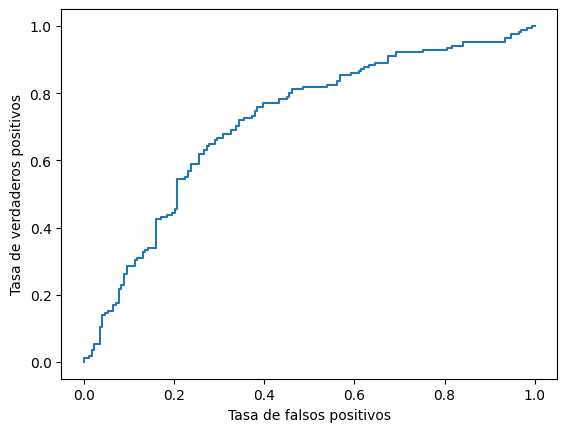

In [ ]:
predicciones_01=modelo.predict(x_test_scaled) # Estimación clases, y_pred
probabilidades_01=modelo.predict_proba(x_test_scaled)  
prob_clase1=probabilidades_01[:,1]
prob_clase0=probabilidades_01[:,0]
tpr,fpr,_=sklearn.metrics.roc_curve(y_true=y_test, y_score=prob_clase1, pos_label=1) #nuestra clase positiva es 1
plt.plot(tpr,fpr) ;plt.xlabel('Tasa de falsos positivos') ; plt.ylabel('Tasa de verdaderos positivos')

- AUC

In [ ]:
sklearn.metrics.roc_auc_score(y_test, prob_clase1)

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

0.7152590998744845

- Como el área bajo la curva es 0.7152590998744845, podemos decir que el modelo no es muy bueno pero tampoco malo.

### <span style='color:burlywood'> 2.3.3 F1 </span>

- El F1-sore viene a ser la media armónica entre la precisión y el recall (sensibilidad)

In [ ]:
print('F1 score:',sklearn.metrics.f1_score(y_true=y_test, y_pred=predicciones_01))

F1 score: 0.6959064327485379


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

### <span style='color:burlywood'> 2.3.4 Curva de precision-recall </span>

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instea

<class 'numpy.ndarray'>


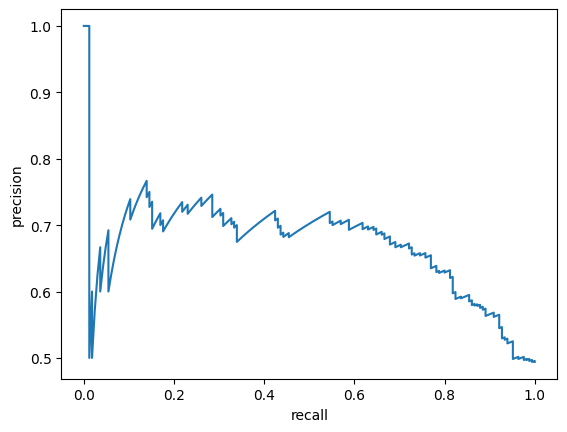

In [ ]:
pr_recall=sklearn.metrics.precision_recall_curve(y_true=y_test, probas_pred=prob_clase1, pos_label=1) #curva de precisión-recall
precision,recall,_=pr_recall
plt.plot(recall,precision) ;plt.xlabel('recall') ; plt.ylabel('precision')
print(type(x_train_scaled))

## <span style='color:darksalmon'> Paso 4: Implementa a mano (sin ayuda de funciones de sklearn) el cálculo de la curva ROC y su AUC </span>

- Función para calcular la curva ROC

In [ ]:
def curva_roc(yreal,probabilidades):
    umbral = np.unique(probabilidades) #Toma los valores únicos para crear el umbral
    clases_predichas ={}
    tpr = []
    fpr = []
    for i in umbral:
        clases_predichas[i] = [0 if j < i else 1 for j in probabilidades] #0 si está debajo del umbral, 1 en caso contrario
    for clase_predicha in clases_predichas.values():
        tpr.append(sum(1 for x, y in zip(yreal, clase_predicha) if x == 1 and y == 1)/yreal.count(1))#true positive rate
        fpr.append(sum(1 for x, y in zip(yreal, clase_predicha) if x == 0 and y == 1)/yreal.count(0))#false positive rate
    return tpr, fpr

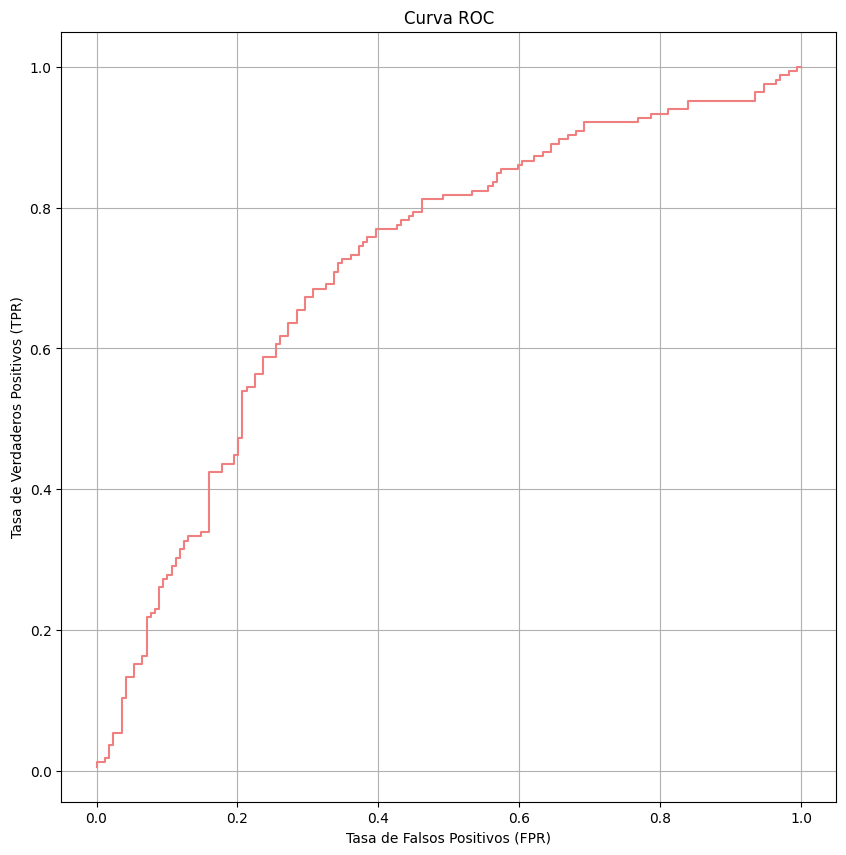

In [ ]:
tpr, fpr = curva_roc(list(y_test),preds_test)
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='lightcoral')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.grid(True)
plt.show()

- Función para calcular su AUC

In [ ]:
def calculate_auc(fpr, tpr):
    # Asegurarse de que las listas estén ordenadas por FPR
    indices = sorted(range(len(fpr)), key=lambda k: fpr[k])
    fpr = [fpr[i] for i in indices]
    tpr = [tpr[i] for i in indices]

    auc = 0.0
    n = len(fpr)

    for i in range(1, n):
        auc += (fpr[i] - fpr[i-1]) * (tpr[i] + tpr[i-1]) / 2.0

    return auc
calculate_auc(fpr, tpr)

0.7158149542764927

### <span style='color:burlywood'> 2.4.1 ¿Coinciden la curva ROC y el AUC implementados a mano con lo que obtienes con sklearn? </span>

- Efectivamente coinciden

## <span style='color:darksalmon'> Paso 5 </span>

### <span style='color:burlywood'> 2.5.1  Suponiendo que un falso positivo (un cliente que se predice que va a irse de la empresa pero se queda) cuesta 1, y un falso positivo (un cliente que se predice que va a quedarse en la empresa pero se va) cuesta 10, calcula, en función del umbral utilizado para decidir con el modelo, el coste promedio. Calcula el umbral óptimo de decisión según esa curva. </span>

In [ ]:
def calcular_coste(yreal, probabilidades, fn=1, fp=10):
    tpr, fpr = curva_roc(yreal, probabilidades)
    
    # Calcular el coste para diferentes umbrales a partir del tpr y del fpr
    coste = [fn * fpr_i + fp * (1 - tpr_i) for fpr_i, tpr_i in zip(fpr, tpr)]
    
    # Encontrar el umbral que minimiza el costo promedio
    umbral_optimo = np.unique(probabilidades)[np.argmin(coste)]
    costo_promedio = min(coste)
    
    return umbral_optimo, costo_promedio
umbral_optimo, costo_promedio = calcular_coste(list(y_test),preds_test)
print(f'Umbral Óptimo: {umbral_optimo}, Costo Promedio: {costo_promedio}')

Umbral Óptimo: 0.004899590905863499, Costo Promedio: 0.9940828402366864


# <span style='color:tan'> SEMANA 3 </span>

## <span style='color:darksalmon'> Paso 1: Clase  Naïve Bayes </span>

In [ ]:
class Naive_Bayes:
    def __init__(self,x_train_scaled,y_train,x_test_scaled=None,y_test=None,laplace=False):
        self.laplace=laplace
        self.x_train_scaled=x_train_scaled
        self.y_train=y_train
        self.x_test_scaled=x_test_scaled
        self.y_test=y_test
    def sacar_mean_std(self,col):
        mean=col.mean()
        
        std=col.std()
        return mean,std    
    def prob_x_distribucion_normal(self,x,mean,sigma)->callable: #
        '''introducimos la función de densidad de probabilidad con parámetros determinados para cada variable numérica'''
        return (1 / np.sqrt(2 * np.pi) * sigma) * np.exp(-((x-mean)**2 / (2 * sigma**2)))    
    def prob_col_numerica(self,col,mean,sigma):
        col=pd.Series(col) #para aplicar apply debe ser una serie
        
        try:
            return col.apply(lambda x:self.prob_x_distribucion_normal(x,mean=mean,sigma=sigma))  #col no cambia, para ello tendríamos que volver a definir la var
        except:
            print(sigma)
            raise Exception
    def prob_col_nominal(self,col):  #trataremos las cols de dummies              
        col=pd.Series(col)
        longitud=len(col)
        if self.laplace==True:
            muestra_add=1 #añadimos muestras ficticias
        else:
            muestra_add=0 #no aplicamos laplace
            d_probs={}
        vc=col.value_counts()
        for fila in col:
            d_probs[fila]=(vc.loc[fila]+muestra_add)/(longitud+2*muestra_add) #numero de veces que aparece ese atributo/numero de muestras
        return d_probs

    def fit(self,X:pd.DataFrame,y):  #train x scaled, train y
        X=pd.DataFrame(X)
        #primero separo muestras de clase 0 y 1
        muestras_c0=X[y==0]
        muestras_c1=X[y==1]
        #diferencio vars numericas y categoricas
        vars_num_c0 = muestras_c0.loc[:, data.dtypes != 'int32'] ;vars_dummy_c0=muestras_c0.loc[:, data.dtypes == 'int32'] #int32 son el tipo que solo tienen las variables dummy
        vars_num_c1 = muestras_c1.loc[:, data.dtypes != 'int32'] ;vars_dummy_c1=muestras_c1.loc[:, data.dtypes == 'int32']
        
        list_mean_std_c0=[] ; list_mean_std_c1=[]
        list_prob_dummy_c0=[] ; list_prob_dummy_c1=[]
        #listas de tuplas con la media y el error correspondientes a cada variable, separando los conjuntos de las 2 clases.

        
        resultados = vars_num_c0.agg(['mean', 'std']).T
        list_mean_std_c0 = [tuple(x) for x in resultados.values]
        resultados = vars_num_c1.agg(['mean', 'std']).T
        list_mean_std_c1 = [tuple(x) for x in resultados.values] #la media y error para cada columna (cambian dependiendo de la clase que condiciona)


        for col in vars_dummy_c1.columns:
            col=X[col].values
            list_prob_dummy_c1.append(self.prob_col_nominal(col))
        for col in vars_dummy_c0.columns:
            col=X[col].values
            list_prob_dummy_c0.append(self.prob_col_nominal(col))
        
        p_c1=len(muestras_c1)/(len(muestras_c1)+len(muestras_c0)) ; p_c0=1-p_c1
        
        return list_mean_std_c0,list_mean_std_c1,list_prob_dummy_c0,list_prob_dummy_c1,p_c0,p_c1

    def predict(self,X:pd.DataFrame): #x_test_scaled
        
        list_mean_std_c0,list_mean_std_c1,list_prob_dummy_c0,list_prob_dummy_c1,p_c0,p_c1=self.fit(self.x_train_scaled,self.y_train)
        prob_atributos_test_c0=[] ; prob_atributos_test_c1=[]
        
        for lista_prob,lista_param_cont,lista_dicts in (prob_atributos_test_c0,list_mean_std_c0,list_prob_dummy_c0),(prob_atributos_test_c1,list_mean_std_c1,list_prob_dummy_c1):
            for colu in X:
                col=X[colu].values #cogemos los valores dentro de la serie
                
                
                if X[colu].dtype!='int32': #var continua
                    
                    
                    mean,sigma=lista_param_cont.pop(0)
                    #print(mean,sigma)
                    lista_prob.append(self.prob_col_numerica(col,mean,sigma))
                else:
                    
                    l=[] ; d=lista_dicts.pop(0)    #esto es una lista de dicts con las probabilidades por cada valor
                    
                    for value in col:
                        l.append(d[value])
                    lista_prob.append(pd.Series(l))
        
        df_probabilidades_c0,df_probabilidades_c1=pd.DataFrame(prob_atributos_test_c0).T,pd.DataFrame(prob_atributos_test_c1).T
        
        prob_finales_test_c0=df_probabilidades_c0.prod(axis=1)*p_c0 #hacemos los productorios y multiplicamos por la prob de la clase
        prob_finales_test_c1=df_probabilidades_c1.prod(axis=1)*p_c1
        df_probabilidades=pd.DataFrame([prob_finales_test_c0,prob_finales_test_c1]).T
        predicciones=[]
        for i in range(len(df_probabilidades)):
            
            if df_probabilidades[0][i]>df_probabilidades[1][i]:
                predicciones.append(0)
            else:
                predicciones.append(1)
        
        return pd.Series(predicciones) #misma longitud que x_test: 334 filas
        
    def score(self,X,y): #x_test_scaled, y_test
        predicciones=self.predict(pd.DataFrame(X))
        #del conjunto test
        pd.set_option('display.max_rows', 25)
        
        predicciones=predicciones.reset_index(drop=True) #tenemos que quitar los indices para ir comparando de uno en uno
        y=y.reset_index(drop=True)                      #la primera predicción que tenemos se corresponde con la primera fila del conjunto test
        longitud=len(y) ; contador=0
        
        for i,k in zip(predicciones,y):
            if i==k: 
                contador +=1 #un acierto más
        print('Score:') 
        return contador/longitud
    

## <span style='color:darksalmon'> Paso 2: Utiliza la clase Naïve Bayes creada en el paso anterior para calcular el score del clasificador en el dataset con el que estamos trabajando en la práctica. </span>

In [484]:
pd.set_option('display.max_rows', 25)
 #para dividir entre filas de clase 0 y 1,
prueba=Naive_Bayes(pd.DataFrame(x_train_a, columns=x_train_a.columns, index=x_train_a.index),y_train)        
#necesitamos que x_train_scaled tenga los índices de filas de x_train
a=prueba.score(x_test_a,y_test) 
xa



Score:


0.5479041916167665

## <span style='color:darksalmon'> Paso 3: Clasifica el conjunto de datos con cada uno de los tres algoritmos de Scikit Learn y compara sus accuracy con el obtenido con la implementación propia. ¿Cuál funciona mejor? ¿Por qué? </span>

- Impotamos las librerías necesarias

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB

- Ajustamos los datos para eliminar los valores negativos

In [68]:
scaler = MinMaxScaler()
x_train_transformed = scaler.fit_transform(x_train) 
x_test_transformed = scaler.transform(x_test)

### <span style='color:burlywood'> CategoricalNB </span>

- Aplicamos el método

In [69]:
categorical = CategoricalNB(fit_prior=True, alpha=0)
categorical.fit(x_train_transformed, y_train)

categorical_nb_train_score = categorical.score(x_train_transformed, y_train)
categorical_nb_test_score = categorical.score(x_test_transformed, y_test)

c:\Users\jimen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
c:\Users\jimen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


- Al contrario que para MultinomialNB, como se verá más adelante, aquí hemos obtenido el valor a priori de cada clase a partir de los datos (fit_prior=True) ya que el modelo aconsejaba (se obtenía un mejor score), y por tanto no hemos tenido que realizar el suavizado.

- Scores:

In [70]:
#Conjunto entrenamiento
categorical_nb_train_score

0.7001287001287001

In [71]:
#Conjunto test
categorical_nb_test_score

0.655688622754491

- Aquí hay alguna diferencia entre los scores. Se produce un poco de sobreajuste

### <span style='color:burlywood'> MultinomialNB </span>

- Aplicamos el método

In [72]:
multinomial_nb = MultinomialNB(fit_prior=False,alpha=1)
multinomial_nb.fit(x_train_transformed, y_train)
multinomial_predicciones = multinomial_nb.predict(x_test_transformed)
multinomial_train_score = multinomial_nb.score(x_train_transformed, y_train)
multinomial_test_score = multinomial_nb.score(x_test_transformed, y_test)

- No se asume el valor a priori de la clase (fit_prior=False) y se aplica la corrección de Laplace ya que hay alguna vraiable categorica que que tiene cero frecuencias observadas (alpha=1). 

- Predicciones:

In [73]:
multinomial_predicciones

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,

- Score:

In [74]:
#Conjunto entrenamiento
multinomial_train_score

0.6924066924066924

In [75]:
#Conjunto test
multinomial_test_score

0.6407185628742516

- Se ajusta mejor al de entrenamiento que al de test, aunque la diferencia no es tan grande como para que haya sobreajuste

### <span style='color:burlywood'> GaussianNB </span>

- Aplicamos el método

In [76]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(x_train_transformed, y_train)
gaussian_predicciones = gaussian_nb.predict(x_test_transformed)
gaussian_nb_train_score = gaussian_nb.score(x_train_transformed, y_train)
gaussian_nb_test_score = gaussian_nb.score(x_test_transformed, y_test)

- Predicciones:

In [77]:
gaussian_predicciones

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,

- Score:

In [78]:
gaussian_nb_train_score

0.6975546975546976

In [79]:
gaussian_nb_test_score

0.625748502994012

- Hay una diferencia algo grande entre los scores, hay algo de sobreajuste. El score es algo alto, la verosimilitud de las variables se acerca a una distribución normal

## <span style='color:darksalmon'> Entregables </span>

- Después de haber probado todos estos modelos, creemos que la mejor opción para hacer las predicciones es el modelo de regresión logística implementado con sklearn (también se puede hacer con stasmodel, ya que son parecidas)

In [81]:
predicciones = pd.read_csv('predicciones.csv') #Abrimos el csv
xe = data_explot.drop('Churn Status', axis=1)
ye = data_explot['Churn Status']
#Hacemos la partición
x_train_e, x_test_e, y_train_e, y_test_e = train_test_split(xe, ye, test_size=0.3, random_state=1) #partición train y test
#Implementamos el modelo
modelo = linear_model.LogisticRegression()
modelo.fit(x_train_e, y_train_e)
# Realizar predicciones 
prediccion = modelo.predict(x_test_e)
for i in range(len(predicciones)):
        if prediccion[i] == 1: #Nos piden incluir el id del cliente que permanecerá en la compañía
            nuevo_valor = predicciones.at[i, 'Customer ID']
            predicciones.at[i, 'Customer ID'] = nuevo_valor
#Sobreescribimos el archivo
#predicciones = pd.DataFrame({'Customer ID': prediccion})
predicciones.to_csv('predicciones.csv', index=False)

c:\Users\jimen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
